In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
 # reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

Design a query to retrieve the last 12 months of precipitation data and plot the results

In [9]:
# Find the first and last date in the data set
first_date = session.query(Measurement.date).order_by(Measurement.date).first()
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"First date: {first_date[0]}, Last date: {last_date[0]}")

First date: 2010-01-01, Last date: 2017-08-23


In [10]:
# Calculate the date 1 year ago from the last data point in the database
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
print("Query Date:", one_year_ago)

Query Date: 2016-08-23


In [11]:
# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, func.max(Measurement.prcp)).\
                              filter(func.strftime("%Y-%m-%d", Measurement.date) >= one_year_ago).\
                              group_by(Measurement.date).all()
precipitation

[('2016-08-23', 1.79),
 ('2016-08-24', 2.28),
 ('2016-08-25', 0.21),
 ('2016-08-26', 0.04),
 ('2016-08-27', 0.18),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.05),
 ('2016-08-31', 2.46),
 ('2016-09-01', 0.02),
 ('2016-09-02', 0.19),
 ('2016-09-03', 1.0),
 ('2016-09-04', 0.74),
 ('2016-09-05', 0.18),
 ('2016-09-06', 1.0),
 ('2016-09-07', 1.35),
 ('2016-09-08', 0.22),
 ('2016-09-09', 0.35),
 ('2016-09-10', 1.16),
 ('2016-09-11', 0.6),
 ('2016-09-12', 1.04),
 ('2016-09-13', 1.2),
 ('2016-09-14', 6.7),
 ('2016-09-15', 3.35),
 ('2016-09-16', 0.61),
 ('2016-09-17', 0.36),
 ('2016-09-18', 0.42),
 ('2016-09-19', 0.25),
 ('2016-09-20', 0.43),
 ('2016-09-21', 1.02),
 ('2016-09-22', 0.75),
 ('2016-09-23', 0.94),
 ('2016-09-24', 0.27),
 ('2016-09-25', 0.04),
 ('2016-09-26', 1.02),
 ('2016-09-27', 1.0),
 ('2016-09-28', 0.08),
 ('2016-09-29', 1.49),
 ('2016-09-30', 0.38),
 ('2016-10-01', 1.02),
 ('2016-10-02', 0.61),
 ('2016-10-03', 0.46),
 ('2016-10-04', 3.46),
 ('2016-10-05', 0.

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation, columns = ["Date", "Precipitation"])
precipitation_df = precipitation_df.set_index("Date")
precipitation_df

,Precipitation
Date,
2016-08-23,1.79
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.56


In [13]:
# Sort the dataframe by date
sorted_precipitation_df = precipitation_df.sort_values("Date", ascending = True)
sorted_precipitation_df

,Precipitation
Date,
2016-08-23,1.79
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.56


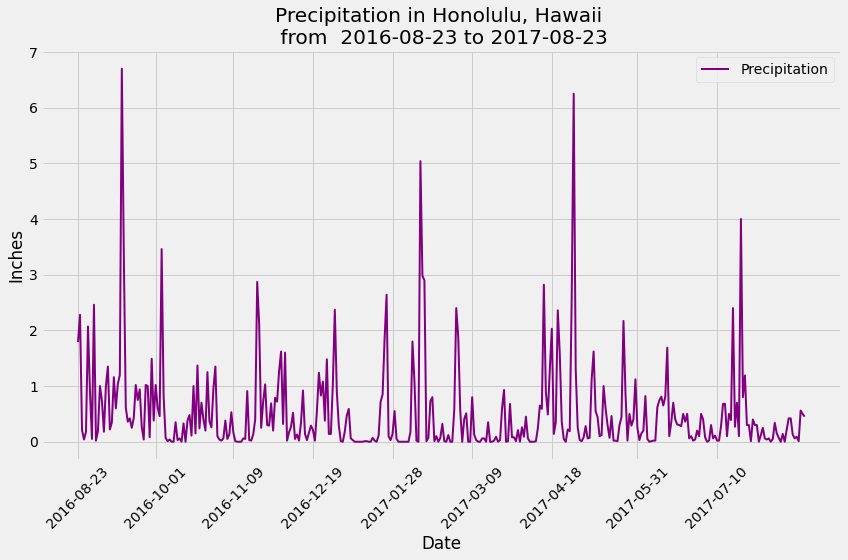

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data

# Set x-axis location
xloc = ["2016-08-23", "2016-10-01", "2016-11-09", "2016-12-19", "2017-01-28", "2017-03-09", "2017-04-18", "2017-05-31", "2017-07-10"] 

# Plot using pyplot
plt.figure(figsize = (12, 8))
plt.plot(sorted_precipitation_df.index, sorted_precipitation_df["Precipitation"], color = "purple", linewidth = 2)
plt.xticks(xloc, rotation = 45)
plt.title(f"Precipitation in Honolulu, Hawaii \n from  {one_year_ago} to {last_date[0]}")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(["Precipitation"], loc = "best")
plt.tight_layout()

plt.savefig("result_images/Precipitation_Plot.png")
plt.show()

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_stats = session.query(Measurement.date, Measurement.prcp).\
                                    filter(Measurement.date >= one_year_ago).all()
precipitation_stats

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [16]:
precipitation_stats_df = pd.DataFrame(precipitation_stats, columns = ["Date", "Precipitation"])
precipitation_stats_df

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [17]:
precipitation_stats_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
# Design a query to show how many stations are available in this dataset?
stations_count = session.query(Station).count()
print(f"There are {stations_count} stations at Honolulu, Hawaii.")


There are 9 stations at Honolulu, Hawaii.


In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, Station.name, func.count(Measurement.id)).\
                                     filter(Measurement.station == Station.station).\
                                     group_by(Measurement.station).\
                                     order_by(func.count(Measurement.id).desc()).all()
most_active_stations

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
station_record = session.query(Measurement.station, func.min(Measurement.tobs),\
                               func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                               filter(Measurement.station == most_active_stations[0][0]).all()

print(f"The most active station is {most_active_stations[0][0]}, {most_active_stations[0][1]}")
print(f"Lowest temp recorded: {station_record[0][1]}F, highest temp recorded: {station_record[0][2]}F, average temp: {round(station_record[0][3], 1)}F")

The most active station is USC00519281, WAIHEE 837.5, HI US
Lowest temp recorded: 54.0F, highest temp recorded: 85.0F, average temp: 71.7F


In [21]:
# Save result to a dataframe
station_record = pd.DataFrame(station_record, columns = ["Station",
                                                         "Lowest Temp Recorded (F)",
                                                         "Highest Temp Recorded (F)",
                                                         "Avg Temp (F)"]).round(1)
station_record

,Station,Lowest Temp Recorded (F),Highest Temp Recorded (F),Avg Temp (F)
0,USC00519281,54.0,85.0,71.7


In [22]:
# Choose the station with the highest number of temperature observations.
print(f"The highest number of temperature observations station is {most_active_stations[0][0]}, {most_active_stations[0][1]}, with {most_active_stations[0][2]} records.")

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
twelve_months_results = session.query(Measurement.tobs).\
                                      filter(Measurement.date.between(one_year_ago, last_date[0]),\
                                      Measurement.station == most_active_stations[0][0]).all()
twelve_months_results

The highest number of temperature observations station is USC00519281, WAIHEE 837.5, HI US, with 2772 records.


[(77.0,),
 (77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),


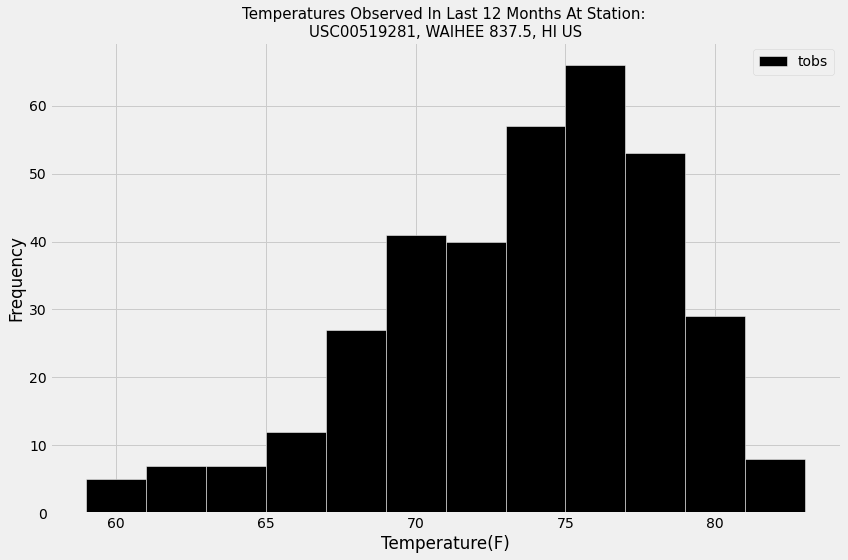

In [23]:
# Plot the results as a histogram
plt.figure(figsize = (12, 8))
plt.hist(np.ravel(twelve_months_results), bins = 12, color = "black", edgecolor = "white")
plt.title(f"Temperatures Observed In Last 12 Months At Station: \n{most_active_stations[0][0]}, {most_active_stations[0][1]}", fontsize = 15)
plt.xlabel('Temperature(F)')
plt.ylabel('Frequency')
plt.legend(["tobs"], loc = "best")
plt.tight_layout()

plt.savefig("result_images/Most_Active_Station_Plot.png")
plt.show()

## Bonus Challenge Assignment

In [24]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                         filter(Measurement.date >= start_date).\
                         filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [25]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_date = "2016-12-25"
end_date = "2017-01-03"
trip_temp = calc_temps(start_date, end_date)
trip_temp

[(62.0, 70.81666666666666, 78.0)]

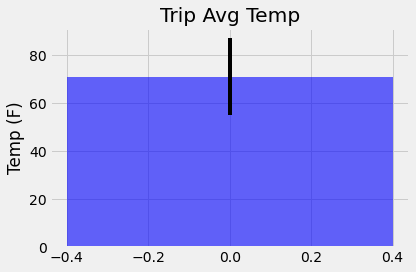

In [26]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
min_temp = trip_temp[0][0]
avg_temp = trip_temp[0][1]
max_temp = trip_temp[0][2]

plt.bar(0, avg_temp, yerr = [max_temp - min_temp], color = "blue", alpha = 0.6)
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")
plt.tight_layout()

plt.savefig("result_images/Trip_Avg_Temp.png")
plt.show()

In [27]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
total_rainfall_by_st = (session.query(Measurement.station,Station.name,func.sum(Measurement.prcp),
                                      Station.latitude,Station.longitude,Station.elevation).\
                                      filter(Measurement.date >= start_date).\
                                      filter(Measurement.date <= end_date).\
                                      filter(Measurement.station == Station.station).\
                                      group_by(Measurement.station).\
                                      order_by(func.sum(Measurement.prcp).desc()).all())

print(f"Daily total rainfall estimates by station for dates between {start_date} and {end_date}.")
total_rainfall_by_st_df = pd.DataFrame(total_rainfall_by_st, columns = ["Station",
                                                                        "Station Name",
                                                                        "Total Rainfall",
                                                                        "Latitude",
                                                                        "Longitude",
                                                                        "Elevation"])
total_rainfall_by_st_df

Daily total rainfall estimates by station for dates between 2016-12-25 and 2017-01-03.


,Station,Station Name,Total Rainfall,Latitude,Longitude,Elevation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",6.47,21.33310,-157.80250,152.4
1,USC00513117,"KANEOHE 838.1, HI US",1.71,21.42340,-157.80150,14.6
2,USC00519281,"WAIHEE 837.5, HI US",1.48,21.45167,-157.84889,32.9
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",1.25,21.52130,-157.83740,7.0
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",0.24,21.33556,-157.71139,19.5
5,USC00519397,"WAIKIKI 717.2, HI US",0.21,21.27160,-157.81680,3.0
6,USC00517948,"PEARL CITY, HI US",NaN,21.39340,-157.97510,11.9


In [28]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

Calculate the daily normals for your trip

In [29]:
# Set the start and end date of the trip
start_date = dt.datetime(2016, 12, 25)
end_date = dt.datetime(2017, 1, 3)
print(f"Trip starts on {start_date}, ends on {end_date}.")

Trip starts on 2016-12-25 00:00:00, ends on 2017-01-03 00:00:00.


In [30]:
# Use the start and end date to create a range of dates
trip_dates_list = pd.date_range(start_date, periods = 10).tolist()
trip_dates_list

[Timestamp('2016-12-25 00:00:00', freq='D'),
 Timestamp('2016-12-26 00:00:00', freq='D'),
 Timestamp('2016-12-27 00:00:00', freq='D'),
 Timestamp('2016-12-28 00:00:00', freq='D'),
 Timestamp('2016-12-29 00:00:00', freq='D'),
 Timestamp('2016-12-30 00:00:00', freq='D'),
 Timestamp('2016-12-31 00:00:00', freq='D'),
 Timestamp('2017-01-01 00:00:00', freq='D'),
 Timestamp('2017-01-02 00:00:00', freq='D'),
 Timestamp('2017-01-03 00:00:00', freq='D')]

In [31]:
# Stip off the year and save a list of %m-%d strings
new_trip_dates_list = []
for date in trip_dates_list:
    new_trip_dates_list.append(dt.datetime.strftime(date, "%m-%d"))
new_trip_dates_list

['12-25',
 '12-26',
 '12-27',
 '12-28',
 '12-29',
 '12-30',
 '12-31',
 '01-01',
 '01-02',
 '01-03']

In [32]:
# Loop through the list of %m-%d strings and calculate the normals for each date
# push each tuple of calculations into a list called `normals`
normals = []
for date in new_trip_dates_list:
    normals.append(daily_normals(date))
normals

[[(60.0, 71.75, 79.0)],
 [(63.0, 71.44680851063829, 77.0)],
 [(62.0, 71.91666666666667, 79.0)],
 [(62.0, 70.52083333333333, 77.0)],
 [(57.0, 70.29166666666667, 78.0)],
 [(63.0, 69.86363636363636, 76.0)],
 [(56.0, 68.27906976744185, 77.0)],
 [(62.0, 69.15384615384616, 77.0)],
 [(60.0, 69.39622641509433, 77.0)],
 [(62.0, 68.9090909090909, 77.0)]]

In [33]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normal_list = []
for normal in normals:
    normal_list.append(np.ravel(normal))
trip_normals_df = pd.DataFrame(normal_list, columns = ["Lowest Temp",
                                                       "Avg Temp",
                                                       "Higest Temp"], index = new_trip_dates_list)
trip_normals_df.index.name = "Date"
trip_normals_df

,Lowest Temp,Avg Temp,Higest Temp
Date,,,
12-25,60.0,71.750000,79.0
12-26,63.0,71.446809,77.0
12-27,62.0,71.916667,79.0
12-28,62.0,70.520833,77.0
12-29,57.0,70.291667,78.0
12-30,63.0,69.863636,76.0
12-31,56.0,68.279070,77.0
01-01,62.0,69.153846,77.0
01-02,60.0,69.396226,77.0


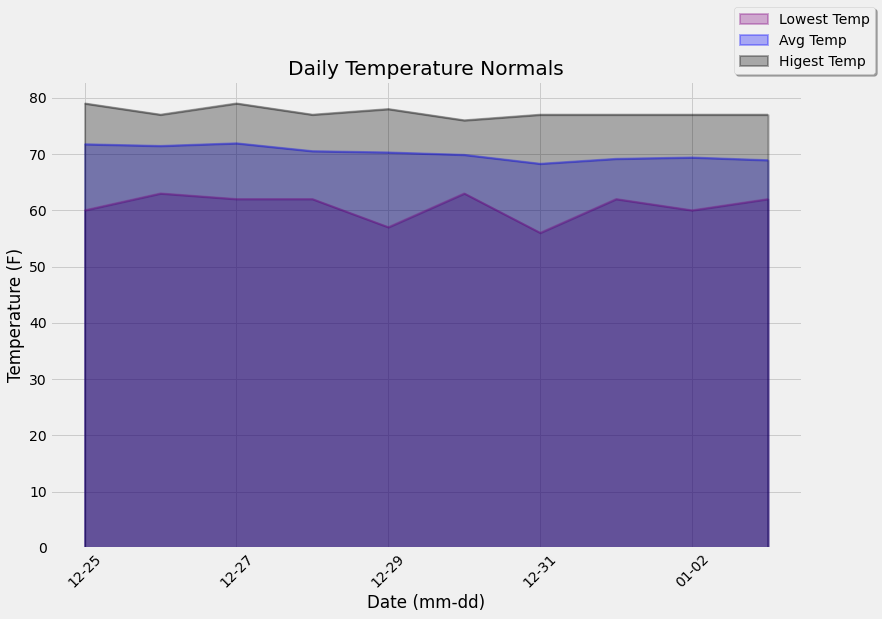

In [34]:
# Plot the daily normals as an area plot with `stacked=False`
plt.rcParams["figure.figsize"] = (12, 8)
colors = ["purple", "blue", "black"]
trip_normals_df.plot.area(linewidth = 2, stacked = False, rot = 45, alpha = 0.3, color = colors)

plt.xlabel("Date (mm-dd)")
plt.ylabel("Temperature (F)")
plt.title("Daily Temperature Normals")
plt.gca().legend(bbox_to_anchor = (0.9, 1), shadow = True)